https://github.com/Prianca25/Machine-Learning/blob/master/Amazon%20Fine%20Food%20Review.ipynb

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('Cat_comment_merge.csv')

In [9]:
df.head()

,Review,Detail,Rating
0,My gang are very picky eaters,I have a momma and 7 half grown kittens. Don't...,4.7
1,Cats eat it,"It may not be the best or the healthiest, alth...",5.0
2,Colony Cats Get Fed,My friend feeds a colony of over 25 cats in a ...,3.0
3,Kitty Crack,"I don't know what it is about Meow Mix, but ev...",5.0
4,My cat loves it!,"Since I don't eat cat food, I can't tell you h...",5.0


In [10]:
df.shape

(977, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  977 non-null    object 
 1   Detail  977 non-null    object 
 2   Rating  977 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


In [12]:
df.Review.head()

0    My gang are very picky eaters
1                      Cats eat it
2              Colony Cats Get Fed
3                      Kitty Crack
4                 My cat loves it!
Name: Review, dtype: object

# Text Preprocessing

In [13]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Detail'] = df['Detail'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [14]:
df['Detail'] = df['Detail'].str.replace('[^\w\s]', "")
df.Detail.head(5)

0    i have a momma and 7 half grown kittens dont w...
1    it may not be the best or the healthiest altho...
2    my friend feeds a colony of over 25 cats in a ...
3    i dont know what it is about meow mix but ever...
4    since i dont eat cat food i cant tell you how ...
Name: Detail, dtype: object

# Removal of Stop Words

In [15]:
stop = stopwords.words('english')
df['Detail'] = df['Detail'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Detail.head()

0    momma 7 half grown kittens dont worry feed kit...
1    may best healthiest although great brand healt...
2    friend feeds colony 25 cats neighborhood acros...
3    dont know meow mix every cat ive owned prefers...
4    since dont eat cat food cant tell flavor tell ...
Name: Detail, dtype: object

# Spelling Correction

## Lemmatization

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
df['Detail'] = df['Detail'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Detail.head()

0    momma 7 half grown kitten dont worry feed kitt...
1    may best healthiest although great brand healt...
2    friend feed colony 25 cat neighborhood across ...
3    dont know meow mix every cat ive owned prefers...
4    since dont eat cat food cant tell flavor tell ...
Name: Detail, dtype: object

## Look at the Summary Text using wordcloud

In [18]:
! pip install wordcloud

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [20]:
df.columns

Index(['Review', 'Detail', 'Rating'], dtype='object')

In [21]:
df.Rating.value_counts()

5.0    688
3.0    114
4.0     95
4.7     38
4.8     36
2.0      6
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

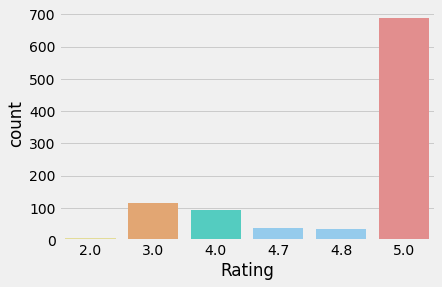

In [38]:
import seaborn as sns
sns.countplot(data = df, x = 'Rating', palette=['khaki','sandybrown','turquoise','lightskyblue','lightskyblue','lightcoral'])

In [23]:
score_2 = df[df['Rating'] == 2]
score_3 = df[df['Rating'] == 3]
score_4 = df[df['Rating'] == 4]
score_4_7 = df[df['Rating'] == 4.7]
score_4_8 = df[df['Rating'] == 4.8]
score_5 = df[df['Rating'] == 5]

In [25]:
reviews_sample = pd.concat([score_4_8,score_2,score_3,score_4,score_4_7,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

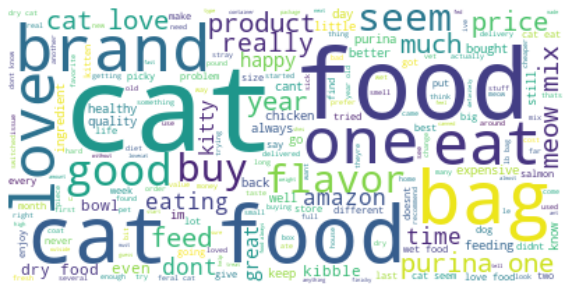

In [26]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Detail.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

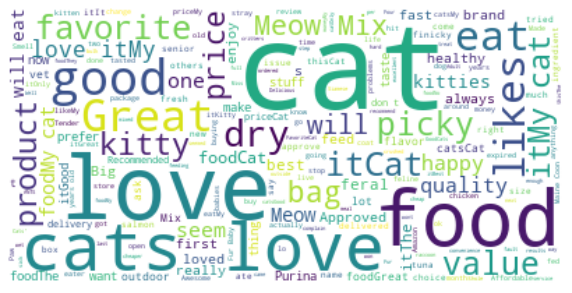

In [27]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([2])]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([4,4.8,4.7,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Detail.str.cat()
positive_reviews_str = positive_reviews.Detail.str.cat()

## Create WordCloud

Text(0.5, 1.0, 'Reviews with Negative Scores')

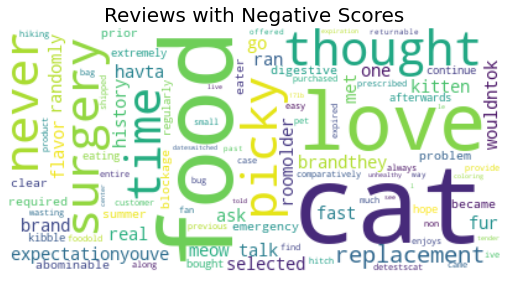

In [30]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

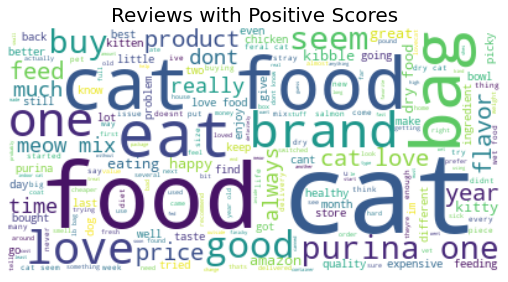

In [31]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()


## Install vaderSentiment

In [43]:
!pip install vaderSentiment

In [32]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [33]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Detail']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.143,0.748,0.109,-0.6371
1,0.070,0.590,0.340,0.9714
2,0.000,0.583,0.417,0.9509
3,0.000,0.820,0.180,0.7650
4,0.000,0.735,0.265,0.7579


In [34]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Review,Detail,Rating,neg,neu,pos,compound
0,My gang are very picky eaters,momma 7 half grown kitten dont worry feed kitt...,4.7,0.143,0.748,0.109,-0.6371
1,Cats eat it,may best healthiest although great brand healt...,5.0,0.070,0.590,0.340,0.9714
2,Colony Cats Get Fed,friend feed colony 25 cat neighborhood across ...,3.0,0.000,0.583,0.417,0.9509


In [35]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Review,Detail,Rating,neg,neu,pos,compound,Sentiment
0,My gang are very picky eaters,momma 7 half grown kitten dont worry feed kitt...,4.7,0.143,0.748,0.109,-0.6371,Negative
1,Cats eat it,may best healthiest although great brand healt...,5.0,0.070,0.590,0.340,0.9714,Positive
2,Colony Cats Get Fed,friend feed colony 25 cat neighborhood across ...,3.0,0.000,0.583,0.417,0.9509,Positive
3,Kitty Crack,dont know meow mix every cat ive owned prefers...,5.0,0.000,0.820,0.180,0.7650,Positive
4,My cat loves it!,since dont eat cat food cant tell flavor tell ...,5.0,0.000,0.735,0.265,0.7579,Positive


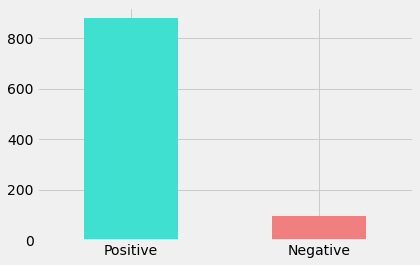

In [39]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['turquoise', 'lightcoral']);